In [161]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [162]:
with open("optim_param/optim_DNN_1_params.json", "r") as f:
    DNN_1_params = json.load(f)

with open("optim_param/optim_DNN_2_params.json", "r") as f:
    DNN_2_params = json.load(f)

with open("optim_param/optim_DNN_3_params.json", "r") as f:
    DNN_3_params = json.load(f)

with open("optim_param/optim_DNN_4_params.json", "r") as f:
    DNN_4_params = json.load(f)

with open("optim_param/optim_DNN_5_params.json", "r") as f:
    DNN_5_params = json.load(f)

with open("optim_param/optim_DNN_6_params.json", "r") as f:
    DNN_6_params = json.load(f)

with open("optim_param/optim_DNN_7_params.json", "r") as f:
    DNN_7_params = json.load(f)

with open("optim_param/optim_ResNet_params.json", "r") as f:
    ResNet_params = json.load(f)

with open("optim_param/optim_FTTansformer_params.json", "r") as f:
    FTTransformer_params = json.load(f)

In [163]:
class DNN_1(nn.Module):
    def __init__(self, input_dim, dropout_rate=DNN_1_params["dropout"]):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.layer2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.layer3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.layer4 = nn.Linear(8, 4)
        self.bn4 = nn.BatchNorm1d(4)
        self.output_layer = nn.Linear(4, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))  
        x = self.dropout(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn3(self.layer3(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn4(self.layer4(x))) 
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [164]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"],dropout3=DNN_2_params["dropout3"],dropout4=DNN_2_params["dropout4"]):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16,8)
        self.layer4 = nn.Linear(8,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [165]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_3_params["dropout1"],dropout2=DNN_3_params["dropout2"]):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [166]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_4_params["dropout1"],dropout2=DNN_4_params["dropout2"]):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [167]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_5_params["dropout1"],dropout2=DNN_5_params["dropout2"]):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [168]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_6_params["dropout1"],dropout2=DNN_6_params["dropout2"]):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [169]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_7_params["dropout1"],dropout2=DNN_7_params["dropout2"]):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [170]:
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=1, embed_dim=FTTransformer_params["embed_dim"], num_heads=FTTransformer_params["num_heads"], num_layers=FTTransformer_params["num_layers"], dropout=FTTransformer_params["dropout"]):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.embedding_dropout = nn.Dropout(dropout)  # 埋め込み層後のDropout
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.output_dropout = nn.Dropout(dropout)  # 出力層前のDropout

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)  # Dropoutを埋め込み層後に適用
        x = x.unsqueeze(1)  # [batch_size, 1, embed_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)  # 平均プーリング
        x = self.output_dropout(x)  # Dropoutを適用
        x = self.fc(x)
        x = torch.sigmoid(x)  # 2値分類用のシグモイド活性化
        return x


In [171]:
class ResidualBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim,dropout1,dropout2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1=nn.Dropout(dropout1)
        
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.bn2 = nn.BatchNorm1d(input_dim)
        self.dropout2=nn.Dropout(dropout2)

    def forward(self, x):
        residual = x  # 入力を保存 (ショートカット)
        out = torch.relu(self.bn1(self.fc1(x)))
        out=self.dropout1(out)

        out = self.bn2(self.fc2(out))
        out=self.dropout2(out)

        out += residual  # ショートカット接続
        return torch.relu(out)


In [172]:
class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, num_blocks=ResNet_params["num_blocks"], hidden_dim=ResNet_params["hidden_dim"], dropout1=ResNet_params["dropout1"], dropout2=ResNet_params["dropout2"]):
        super(ResNetBinaryClassifier, self).__init__()
        self.blocks = nn.Sequential(
            *[ResidualBlock(input_dim, hidden_dim, dropout1, dropout2) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(input_dim, 1)  # 出力層

    def forward(self, x):
        x = self.blocks(x)
        x = torch.sigmoid(self.output_layer(x))  # 2値分類用シグモイド
        return x

In [173]:
df=pd.read_csv('learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [174]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "model_params/DNN_1.pth",
    "model_params/DNN_2.pth",
    "model_params/DNN_3.pth",
    "model_params/DNN_4.pth",
    "model_params/DNN_5.pth",
    "model_params/DNN_6.pth",
    "model_params/DNN_7.pth",
    "model_params/FTTransformer.pth",
    "model_params/ResNet.pth",
    ]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 4: DNN_5,
                 5: DNN_6,
                 6: DNN_7,
                 7:FTTransformer,
                 8:ResNetBinaryClassifier
                 }

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

/tmp/ipykernel_1421115/1801429464.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))
/home/gonken/anaconda3/en

In [175]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 9])
Test DL Features Shape: torch.Size([878, 9])


In [176]:
train_DL_features_np = train_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_DL_features_np.reshape(-1, train_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=42)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"train_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
train_standardized_features = scaler_standard.fit_transform(all_features)

print(f"train_standardized_features.shape: {train_standardized_features.shape}")

all_features.shape: (3508, 20)
train_DL_features_np.shape: (3508, 9)
train_standardized_features.shape: (3508, 20)


In [177]:
test_DL_features_np = test_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(test_DL_features_np.reshape(-1, test_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=42)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"test_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
test_standardized_features = scaler_standard.fit_transform(all_features)

print(f"test_standardized_features.shape: {test_standardized_features.shape}")

all_features.shape: (878, 20)
test_DL_features_np.shape: (3508, 9)
test_standardized_features.shape: (878, 20)


In [178]:
X_train, X_val, y_train, y_val = train_test_split(train_standardized_features, y_train, test_size=0.1,random_state=42)

In [179]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_val_tensor=torch.tensor(X_val, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(test_standardized_features, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [180]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)

In [184]:
class meta_model(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"]):
        super(meta_model, self).__init__()
        self.layer1 = nn.Linear(input_dim,16)
        self.layer2 = nn.Linear(16,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(16)
        self.bn2=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [185]:
def objective(trial):
    # ハイパーパラメータのサンプリング
    dropout1 = trial.suggest_float("dropout1", 0, 0.5, step=0.05)
    dropout2 = trial.suggest_float("dropout2", 0, 0.5, step=0.05)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
    weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
    

    # モデル定義
    model = meta_model(
        input_dim=X_train_tensor.shape[1],
        dropout1=dropout1,
        dropout2=dropout2
    ).to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

    # Early Stoppingの設定
    patience = 10
    best_val_loss = float('inf')
    patience_counter = 0

    # 訓練ループ
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.squeeze())
            loss.backward()
            optimizer.step()

        # バリデーション評価
        model.eval()
        val_loss = 0
        val_true, val_pred = [], []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss += criterion(val_outputs, y_val.squeeze()).item()
                predictions = (val_outputs >=0.5).float()  
                val_true.extend(y_val.cpu().numpy())
                val_pred.extend(predictions.cpu().numpy())

        val_loss /= len(val_loader)

        # Early Stopping判定
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Optunaへのログ
        trial.report(val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # 評価指標の計算
    mcc = matthews_corrcoef(val_true, val_pred)
    print(f"Final MCC: {mcc:.4f}")

    return mcc  # mccを返す


In [186]:
device_id = 1
torch.cuda.set_device(device_id)
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# Optunaの設定
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=100)

# 結果表示
print("Best Parameters: ", study.best_params)
print("Best Validation F1: ", study.best_value)

[I 2024-12-12 22:18:17,868] A new study created in memory with name: no-name-5cf5bd3b-d177-4168-aac7-e38232019b5c
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:20,070] Trial 0 finished with value: 0.16989593905735928 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.25, 'learning_rate': 0.00245512281863588, 'weight_decay': 0.01020529248199102}. Best is trial 0 with value: 0.16989

Early stopping at epoch 19
Final MCC: 0.1699


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:22,857] Trial 1 finished with value: 0.19237062288668477 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.25, 'learning_rate': 0.00023858323157388236, 'weight_decay': 0.00010032504401583775}. Best is trial 1 with value: 0.19237062288668477.


Early stopping at epoch 28
Final MCC: 0.1924


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:24,096] Trial 2 finished with value: 0.1137639085595968 and parameters: {'dropout1': 0.05, 'dropout2': 0.45, 'learning_rate': 0.08992338993624212, 'weight_decay': 0.00040830323464970467}. Best is trial 1 with value: 0.19237062288668477.


Early stopping at epoch 14
Final MCC: 0.1138


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:25,006] Trial 3 finished with value: 0.17919744387838185 and parameters: {'dropout1': 0.05, 'dropout2': 0.0, 'learning_rate': 0.014677324851039225, 'weight_decay': 0.019688317163397907}. Best is trial 1 with value: 0.19237062288668477.


Early stopping at epoch 12
Final MCC: 0.1792


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:26,717] Trial 4 finished with value: 0.19198791668238677 and parameters: {'dropout1': 0.4, 'dropout2': 0.1, 'learning_rate': 0.026705426617029855, 'weight_decay': 0.04434512074367581}. Best is trial 1 with value: 0.19237062288668477.


Early stopping at epoch 16
Final MCC: 0.1920


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:32,497] Trial 5 finished with value: 0.17580243488066621 and parameters: {'dropout1': 0.0, 'dropout2': 0.25, 'learning_rate': 0.00026149697026435443, 'weight_decay': 0.01788921157004144}. Best is trial 1 with value: 0.19237062288668477.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fea

Early stopping at epoch 54
Final MCC: 0.1758


[I 2024-12-12 22:18:32,725] Trial 7 pruned. 
[I 2024-12-12 22:18:43,584] Trial 8 finished with value: 0.22021303264001046 and parameters: {'dropout1': 0.5, 'dropout2': 0.35000000000000003, 'learning_rate': 0.0001302573407050846, 'weight_decay': 0.017103213177916222}. Best is trial 8 with value: 0.22021303264001046.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:43,700] Trial 9 pruned. 


Final MCC: 0.2202


[I 2024-12-12 22:18:43,832] Trial 10 pruned. 
[I 2024-12-12 22:18:52,397] Trial 11 finished with value: 0.14869844241856267 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.35000000000000003, 'learning_rate': 0.000497919590534935, 'weight_decay': 0.005453878481103382}. Best is trial 8 with value: 0.22021303264001046.


Early stopping at epoch 80
Final MCC: 0.1487


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:55,873] Trial 12 finished with value: 0.20824645909674402 and parameters: {'dropout1': 0.2, 'dropout2': 0.35000000000000003, 'learning_rate': 0.0005597055915784842, 'weight_decay': 0.0006710207344369516}. Best is trial 8 with value: 0.22021303264001046.


Early stopping at epoch 36
Final MCC: 0.2082


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:18:58,836] Trial 13 finished with value: 0.2060315014550851 and parameters: {'dropout1': 0.2, 'dropout2': 0.4, 'learning_rate': 0.000764334917444214, 'weight_decay': 0.0007192885889810617}. Best is trial 8 with value: 0.22021303264001046.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

Early stopping at epoch 27
Final MCC: 0.2060


[I 2024-12-12 22:19:07,054] Trial 15 finished with value: 0.2629502940535666 and parameters: {'dropout1': 0.2, 'dropout2': 0.15000000000000002, 'learning_rate': 0.00011190568251268883, 'weight_decay': 0.004483476900241638}. Best is trial 15 with value: 0.2629502940535666.


Early stopping at epoch 75
Final MCC: 0.2630


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:19:17,891] Trial 16 finished with value: 0.0 and parameters: {'dropout1': 0.25, 'dropout2': 0.15000000000000002, 'learning_rate': 0.00010481897440890198, 'weight_decay': 0.0050944260685961045}. Best is trial 15 with value: 0.2629502940535666.


Final MCC: 0.0000


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:19:27,807] Trial 17 finished with value: 0.19633793724223814 and parameters: {'dropout1': 0.45, 'dropout2': 0.15000000000000002, 'learning_rate': 0.0002643833799538561, 'weight_decay': 0.0286849083415514}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v

Early stopping at epoch 93
Final MCC: 0.1963


[I 2024-12-12 22:19:37,768] Trial 19 finished with value: 0.23456648721306436 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.30000000000000004, 'learning_rate': 0.00018240312748272962, 'weight_decay': 0.0027240598681741103}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:19:37,898] Trial 20 pruned. 


Early stopping at epoch 90
Final MCC: 0.2346


[I 2024-12-12 22:19:38,030] Trial 21 pruned. 
[I 2024-12-12 22:19:38,161] Trial 22 pruned. 
[I 2024-12-12 22:19:38,284] Trial 23 pruned. 
[I 2024-12-12 22:19:38,414] Trial 24 pruned. 
[I 2024-12-12 22:19:48,941] Trial 25 finished with value: 0.12900094070966361 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.30000000000000004, 'learning_rate': 0.00034686173778404155, 'weight_decay': 0.09730941676049998}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

Final MCC: 0.1290


[I 2024-12-12 22:19:49,185] Trial 27 pruned. 
[I 2024-12-12 22:19:49,303] Trial 28 pruned. 
[I 2024-12-12 22:20:00,249] Trial 29 finished with value: 0.23456648721306436 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.25, 'learning_rate': 0.00015717732671742575, 'weight_decay': 0.011581970207922374}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 

Final MCC: 0.2346


[I 2024-12-12 22:20:00,569] Trial 32 pruned. 
[I 2024-12-12 22:20:00,694] Trial 33 pruned. 
[I 2024-12-12 22:20:09,498] Trial 34 finished with value: 0.22021303264001046 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.2, 'learning_rate': 0.00021333673898528006, 'weight_decay': 0.011176403569579364}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2

Early stopping at epoch 85
Final MCC: 0.2202


[I 2024-12-12 22:20:09,748] Trial 36 pruned. 
[I 2024-12-12 22:20:09,852] Trial 37 pruned. 
[I 2024-12-12 22:20:09,968] Trial 38 pruned. 
[I 2024-12-12 22:20:10,086] Trial 39 pruned. 
[I 2024-12-12 22:20:10,188] Trial 40 pruned. 
[I 2024-12-12 22:20:10,306] Trial 41 pruned. 
[I 2024-12-12 22:20:10,422] Trial 42 pruned. 
[I 2024-12-12 22:20:16,282] Trial 43 finished with value: 0.2253425835243262 and parameters: {'dropout1': 0.25, 'dropout2': 0.15000000000000002, 'learning_rate': 0.00020093513478540982, 'weight_decay': 0.004113716326516047}. Best is trial 15 with value: 0.2629502940535666.


Early stopping at epoch 55
Final MCC: 0.2253


/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:20:22,152] Trial 44 finished with value: 0.19255518083326909 and parameters: {'dropout1': 0.25, 'dropout2': 0.15000000000000002, 'learning_rate': 0.0005385911515683612, 'weight_decay': 0.002423408665476769}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in

Early stopping at epoch 55
Final MCC: 0.1926


[I 2024-12-12 22:20:32,669] Trial 46 finished with value: 0.2601302125462921 and parameters: {'dropout1': 0.2, 'dropout2': 0.35000000000000003, 'learning_rate': 0.0001308677173298209, 'weight_decay': 0.005833497857889777}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:20:32,788] Trial 47 pruned. 


Final MCC: 0.2601


[I 2024-12-12 22:20:32,908] Trial 48 pruned. 
[I 2024-12-12 22:20:33,024] Trial 49 pruned. 
[I 2024-12-12 22:20:42,345] Trial 50 finished with value: 0.13792079258844206 and parameters: {'dropout1': 0.25, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0004640566483822777, 'weight_decay': 0.005775410122286573}. Best is trial 15 with value: 0.2629502940535666.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2

Early stopping at epoch 88
Final MCC: 0.1379


[I 2024-12-12 22:20:42,596] Trial 52 pruned. 
[I 2024-12-12 22:20:42,725] Trial 53 pruned. 
[I 2024-12-12 22:20:42,854] Trial 54 pruned. 
[I 2024-12-12 22:20:42,981] Trial 55 pruned. 
[I 2024-12-12 22:20:43,110] Trial 56 pruned. 
[I 2024-12-12 22:20:43,238] Trial 57 pruned. 
[I 2024-12-12 22:20:43,367] Trial 58 pruned. 
[I 2024-12-12 22:20:43,495] Trial 59 pruned. 
[I 2024-12-12 22:20:43,622] Trial 60 pruned. 
[I 2024-12-12 22:20:43,726] Trial 61 pruned. 
[I 2024-12-12 22:20:43,854] Trial 62 pruned. 
[I 2024-12-12 22:20:49,807] Trial 63 finished with value: 0.29423919957760236 and parameters: {'dropout1': 0.35000000000000003, 'dropout2': 0.2, 'learning_rate': 0.00018640742190033724, 'weight_decay': 0.015210881606490572}. Best is trial 63 with value: 0.29423919957760236.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_floa

Early stopping at epoch 53
Final MCC: 0.2942


[I 2024-12-12 22:20:50,058] Trial 65 pruned. 
[I 2024-12-12 22:20:50,188] Trial 66 pruned. 
[I 2024-12-12 22:21:01,070] Trial 67 finished with value: 0.29817371283399563 and parameters: {'dropout1': 0.5, 'dropout2': 0.2, 'learning_rate': 0.00010142164588457326, 'weight_decay': 0.006116488052196242}. Best is trial 67 with value: 0.29817371283399563.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:21

Final MCC: 0.2982


[I 2024-12-12 22:21:01,330] Trial 69 pruned. 
[I 2024-12-12 22:21:01,458] Trial 70 pruned. 
[I 2024-12-12 22:21:01,583] Trial 71 pruned. 
[I 2024-12-12 22:21:01,721] Trial 72 pruned. 
[I 2024-12-12 22:21:01,848] Trial 73 pruned. 
[I 2024-12-12 22:21:01,974] Trial 74 pruned. 
[I 2024-12-12 22:21:02,085] Trial 75 pruned. 
[I 2024-12-12 22:21:02,210] Trial 76 pruned. 
[I 2024-12-12 22:21:02,340] Trial 77 pruned. 
[I 2024-12-12 22:21:02,467] Trial 78 pruned. 
[I 2024-12-12 22:21:02,597] Trial 79 pruned. 
[I 2024-12-12 22:21:02,728] Trial 80 pruned. 
[I 2024-12-12 22:21:02,851] Trial 81 pruned. 
[I 2024-12-12 22:21:12,252] Trial 82 finished with value: 0.27533366183038216 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.2, 'learning_rate': 0.00012341952769439482, 'weight_decay': 0.031334112871788}. Best is trial 67 with value: 0.29817371283399563.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remo

Early stopping at epoch 90
Final MCC: 0.2753


[I 2024-12-12 22:21:12,482] Trial 84 pruned. 
[I 2024-12-12 22:21:23,251] Trial 85 finished with value: 0.2790189265994532 and parameters: {'dropout1': 0.25, 'dropout2': 0.2, 'learning_rate': 0.00011858443145057931, 'weight_decay': 0.052157199544943196}. Best is trial 67 with value: 0.29817371283399563.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:21:23,388] Trial 86 pruned. 


Final MCC: 0.2790


[I 2024-12-12 22:21:34,067] Trial 87 finished with value: 0.24305670822507378 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.25, 'learning_rate': 0.00014769451766640312, 'weight_decay': 0.04241164840754059}. Best is trial 67 with value: 0.29817371283399563.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:21:34,199] Trial 88 pruned. 


Final MCC: 0.2431


[I 2024-12-12 22:21:34,334] Trial 89 pruned. 
[I 2024-12-12 22:21:44,447] Trial 90 finished with value: 0.0 and parameters: {'dropout1': 0.35000000000000003, 'dropout2': 0.2, 'learning_rate': 0.00011155215135806786, 'weight_decay': 0.07553932954241735}. Best is trial 67 with value: 0.29817371283399563.
/tmp/ipykernel_1421115/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_1421115/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-12 22:21:44,564] Trial 91 pruned. 


Final MCC: 0.0000


[I 2024-12-12 22:21:44,693] Trial 92 pruned. 
[I 2024-12-12 22:21:44,821] Trial 93 pruned. 
[I 2024-12-12 22:21:44,941] Trial 94 pruned. 
[I 2024-12-12 22:21:45,066] Trial 95 pruned. 
[I 2024-12-12 22:21:45,191] Trial 96 pruned. 
[I 2024-12-12 22:21:45,317] Trial 97 pruned. 
[I 2024-12-12 22:21:45,441] Trial 98 pruned. 
[I 2024-12-12 22:21:45,589] Trial 99 pruned. 


Best Parameters:  {'dropout1': 0.5, 'dropout2': 0.2, 'learning_rate': 0.00010142164588457326, 'weight_decay': 0.006116488052196242}
Best Validation F1:  0.29817371283399563


In [187]:
best_params = study.best_params

# JSON形式で保存
with open("optim_param/stack_DNN_params.json", "w") as f:
    json.dump(best_params, f)

print("Best parameters saved to 'best_params.json'")

Best parameters saved to 'best_params.json'


Epoch [1/60], Loss: 0.7452
Epoch [1/60], Train Loss: 0.7452, Val Loss: 0.7250
Epoch [2/60], Loss: 0.7440
Epoch [2/60], Train Loss: 0.7440, Val Loss: 0.7201
Epoch [3/60], Loss: 0.7416
Epoch [3/60], Train Loss: 0.7416, Val Loss: 0.7154
Epoch [4/60], Loss: 0.7322
Epoch [4/60], Train Loss: 0.7322, Val Loss: 0.7103
Epoch [5/60], Loss: 0.7265
Epoch [5/60], Train Loss: 0.7265, Val Loss: 0.7061
Epoch [6/60], Loss: 0.7208
Epoch [6/60], Train Loss: 0.7208, Val Loss: 0.7049
Epoch [7/60], Loss: 0.7191
Epoch [7/60], Train Loss: 0.7191, Val Loss: 0.6997
Epoch [8/60], Loss: 0.7074
Epoch [8/60], Train Loss: 0.7074, Val Loss: 0.6950
Epoch [9/60], Loss: 0.7089
Epoch [9/60], Train Loss: 0.7089, Val Loss: 0.6920
Epoch [10/60], Loss: 0.6993
Epoch [10/60], Train Loss: 0.6993, Val Loss: 0.6929
Epoch [11/60], Loss: 0.6938
Epoch [11/60], Train Loss: 0.6938, Val Loss: 0.6905
Epoch [12/60], Loss: 0.6926
Epoch [12/60], Train Loss: 0.6926, Val Loss: 0.6880
Epoch [13/60], Loss: 0.6866
Epoch [13/60], Train Loss: 0.6

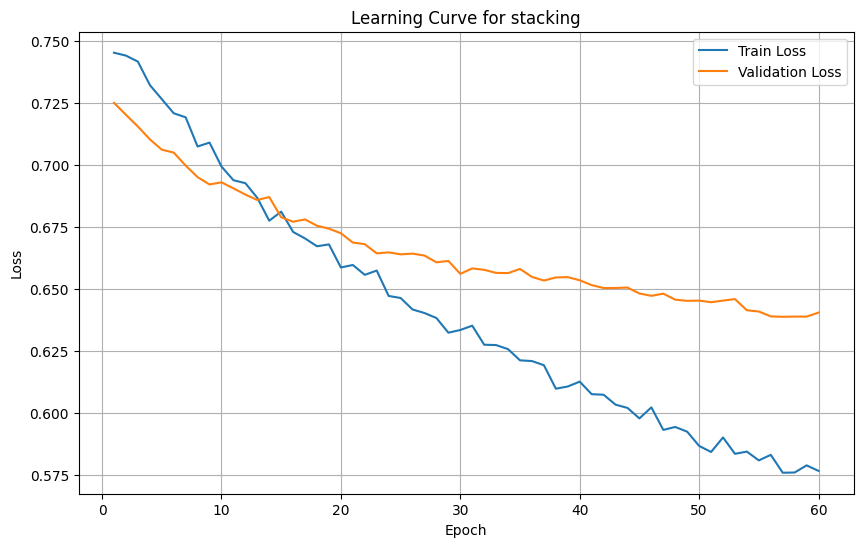

In [270]:
best_params=study.best_params
model = meta_model(input_dim=X_train_tensor.shape[1],
              dropout1=best_params["dropout1"],
              dropout2=best_params["dropout2"]).to(device)
# 最適化と訓練を実行
optimizer = optim.Adam(model.parameters(), lr=best_params["learning_rate"],weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

num_epochs=60
train_losses = []
val_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if val_loader is not None:
        model.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val.squeeze())
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        model.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for stacking')
plt.legend()
plt.grid()
plt.show()

Accuracy: 58.43%
Precision: 0.4795
Recall: 0.8968
F1 Score: 0.6249
Matthews Correlation Coefficient: 0.3092
Specificity: 0.3878


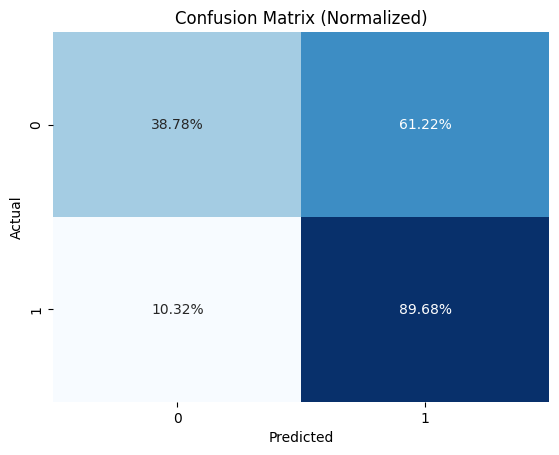

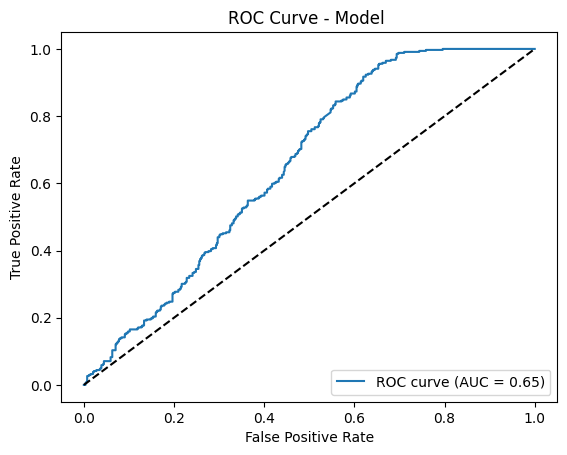

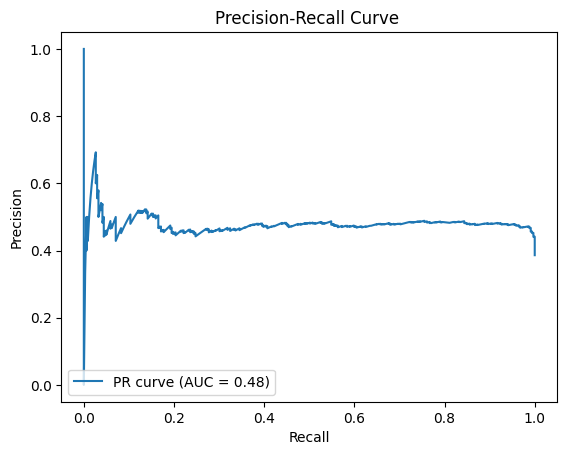

In [271]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # 予測と確率
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs >=0.5).float()
    y_true = y_test_tensor.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    y_prob = test_outputs.cpu().numpy()

# 評価指標
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Matthews Correlation Coefficient: {mcc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # 混同行列（割合表示）
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Normalized)")
    plt.show()

    # ROC曲線とAUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model ')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall曲線
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ')
    plt.legend(loc="lower left")
    plt.show()    

In [ ]:
torch.save(model.state_dict(), 'model_params/stack_model_DNN.pth')